# Software Undergound Rendezvous: Feb 5 2021
## Importance of noise estimates when solving inverse problems in the "real" world
## Part 2 Analysis
### Sean Walker

----

## Import modules


In [28]:
%matplotlib inline

In [29]:
from pathlib import Path
from types import SimpleNamespace

from scripts.dc_inv_utils import *


----

## Look at results

**Set up path**



In [30]:
# path to the directory containing our results
results_path = Path('results')




**Load the setup info**

In [31]:
# Get setup file name
setup_filename = Path(results_path / "setup.pkl")
# load file
setup_dict = load_results_dict(setup_filename)
# get variables out of the dict into the setup namespace s
s = SimpleNamespace(**setup_dict)

**Plot the starting model**

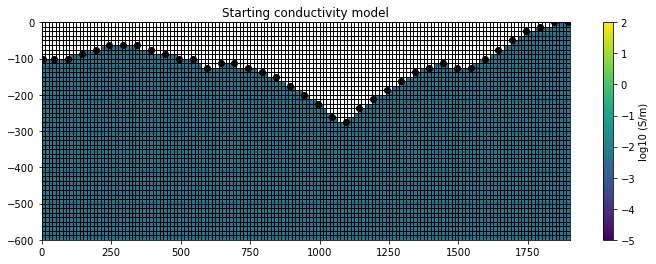

In [32]:
fig_model, ax_model = plot_model(s.mesh, np.log10(np.exp(s.starting_conductivity_model)), s.plotting_map, core_defn=s.core_defn, locations=s.unique_locations,
               clim=(-5, 2), grid=True, title='Starting conductivity model', cbar_title='log10 (S/m)')

**Plot the observed data as apparent resistivity**

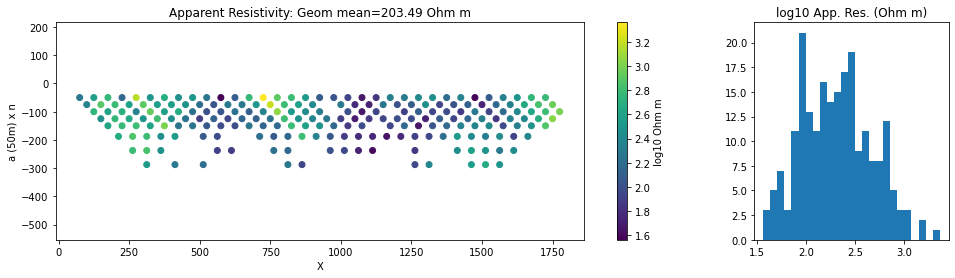

In [33]:
fig_ar, ax_ar = plot_data(np.c_[s.mid_x, s.mid_z, np.log10(s.app_res)], fig_ax=None,
                          data_title=f"Apparent Resistivity: Geom mean={s.app_res_mean:.2f} Ohm m", 
                          x_label='X', y_label='a (50m) x n', cbar_title='log10 Ohm m', bins=25,
                          hist_title='log10 App. Res. (Ohm m)')

**Plot the observed data as normalized voltage**

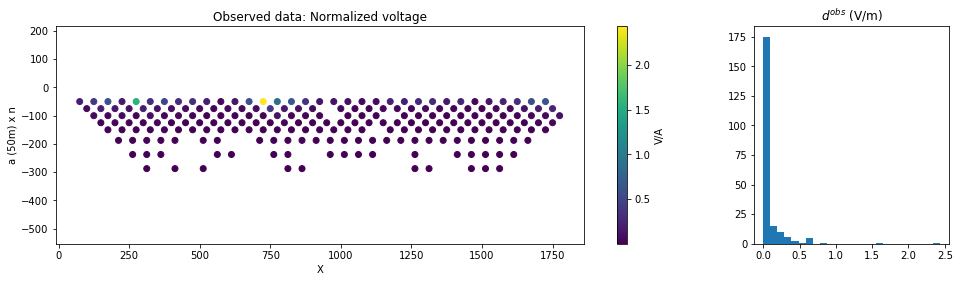

In [34]:
fig_dobs, ax_dobs = plot_data(np.c_[s.mid_x, s.mid_z, s.dc_data.dobs], fig_ax=None,
                          data_title='Observed data: Normalized voltage',
                          x_label='X', y_label='a (50m) x n', cbar_title='V/A', bins=25,
                          hist_title='$d^{obs}$ (V/m)')


**Plot the observed data as normalized voltage with a limited color range**

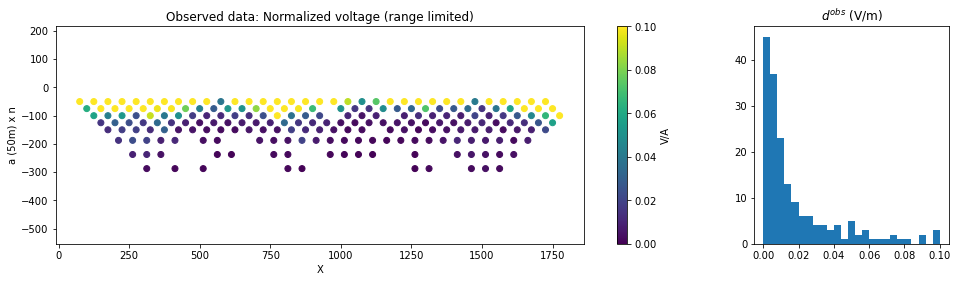

In [35]:
fig_dobs_lim, ax_dobs_lim = plot_data(np.c_[s.mid_x, s.mid_z, s.dc_data.dobs], fig_ax=None,
                          data_title='Observed data: Normalized voltage (range limited)', data_lim=[0, 0.1],
                          x_label='X', y_label='a (50m) x n', cbar_title='V/A', bins=25,
                          hist_title='$d^{obs}$ (V/m)')


**Load inversion results**

In [36]:
# load file
inv_5_per_filename = Path(results_path / "inv_std_dc_5_per.pkl")
inv_5_per_dict = load_results_dict(inv_5_per_filename)
# get variables out of the dict into the setup namespace inv1
inv_5per = SimpleNamespace(**inv_5_per_dict)


### Plot convergence curves

In [37]:
def plot_results(it, setup_dict, inv_dict, clim=None):
    plot_conv_curve(inv_dict.phi_d, inv_dict.phi_m, inv_dict.beta, it=it)
    plot_inv_result(it, setup_dict.mesh, inv_dict.inv_out[it]['m'], setup_dict.plotting_map,
                    inv_dict.inv_out[it]['dpred'], setup_dict.dc_data.dobs, inv_dict.std_dc,
                    setup_dict.mid_x, setup_dict.mid_z, core_defn=setup_dict.core_defn, clim=clim)
    
def plot_model_wrapper(it, setup_dict, inv_dict, title_str, clim=None):
    title_str = title_str + f" at iteration {it}"
    plot_model(setup_dict.mesh, inv_dict.inv_out[it]['m'], setup_dict.plotting_map, core_defn=setup_dict.core_defn,
               clim=clim, title=title_str,
               cbar_title='S/m')
    
def plot_data_diff_wrapper(it, setup_dict, inv_dict, title_str, data_lim=None):
    title_str = title_str + f" at iteration {it}"
    data_diff = (setup_dict.dc_data.dobs - inv_dict.inv_out[it]['dpred'])/inv_dict.std_dc
    plot_data(np.c_[setup_dict.mid_x, setup_dict.mid_z, data_diff],
              data_lim=data_lim, data_title=title_str,
              x_label='X', y_label='Z', cbar_title='no units', bins=25,
              hist_title='Data diff')

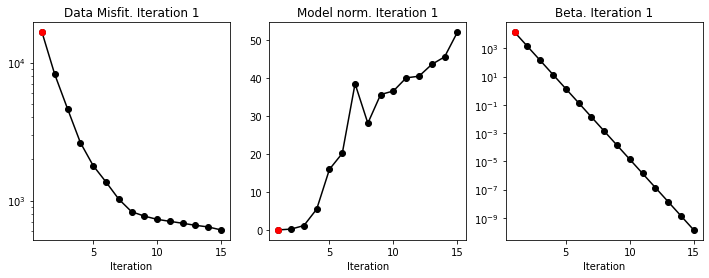

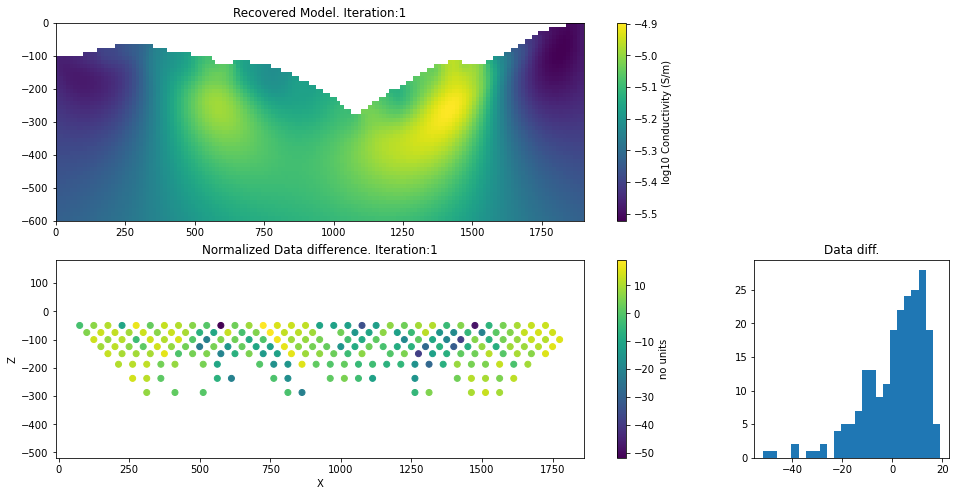

In [38]:
#iteration 1
# clim=[-6, -1]
clim=None
plot_results(1, s, inv_5per, clim)

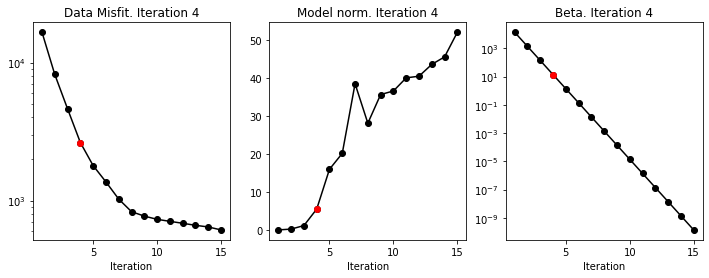

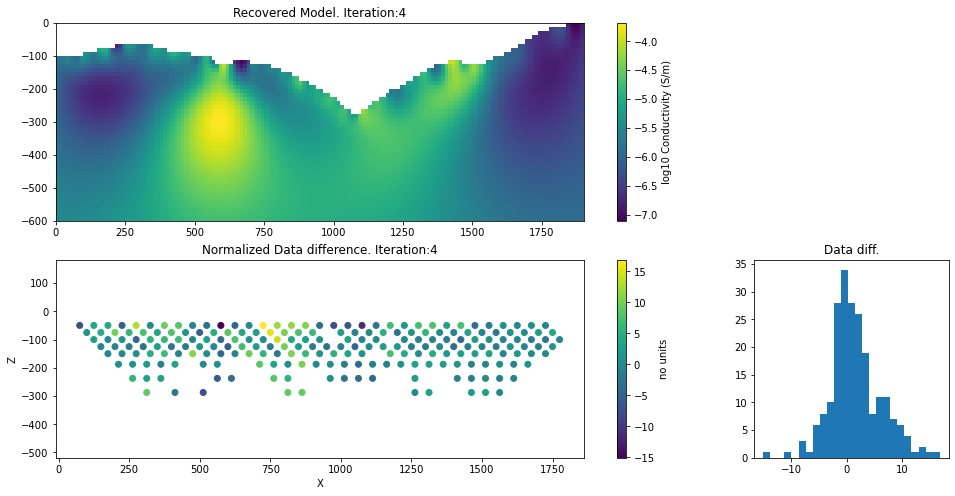

In [39]:
plot_results(4, s, inv_5per, clim)

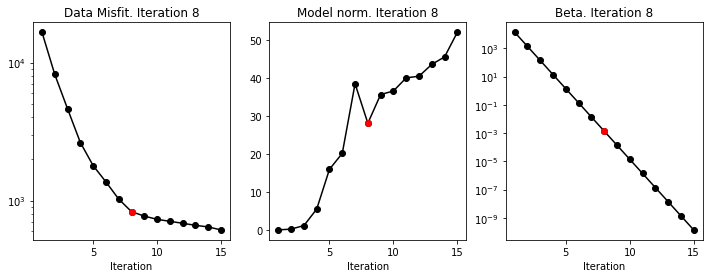

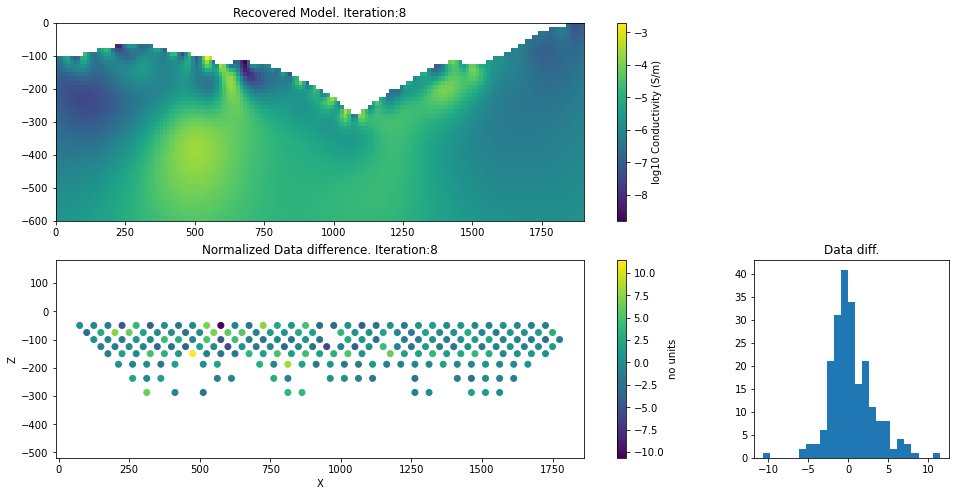

In [40]:
plot_results(8, s, inv_5per, clim)

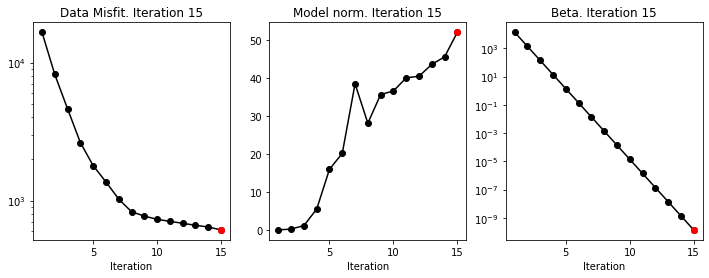

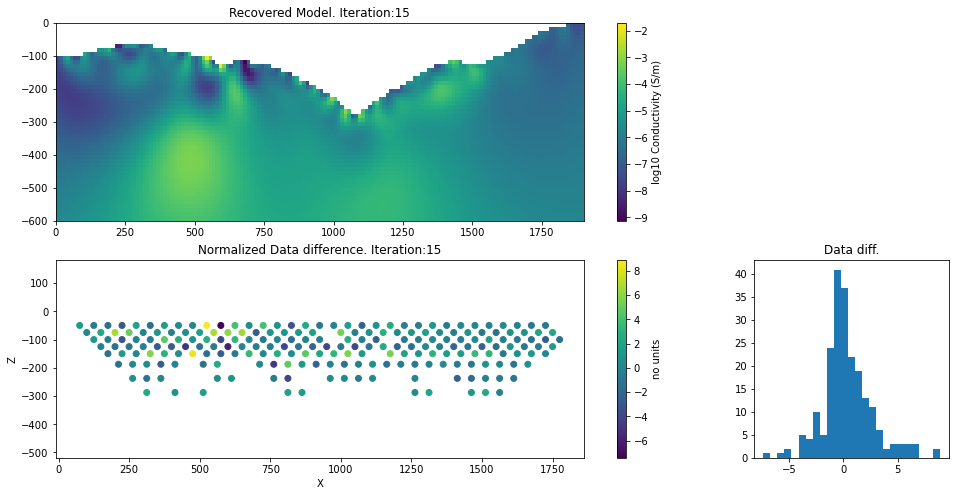

In [41]:
plot_results(15, s, inv_5per, clim)

### Load rescaled inversion results

In [42]:
# load file
inv_std_5_per_rescale_filename = Path(results_path / "inv_std_5_per_rescale.pkl")
inv_5_per_rescale_dict = load_results_dict(inv_std_5_per_rescale_filename)
# get variables out of the dict into the setup namespace inv1
inv_5per_rs = SimpleNamespace(**inv_5_per_rescale_dict)

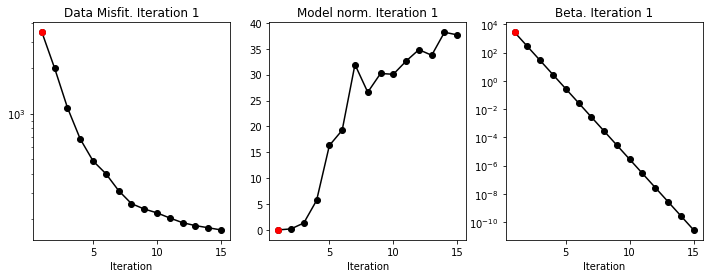

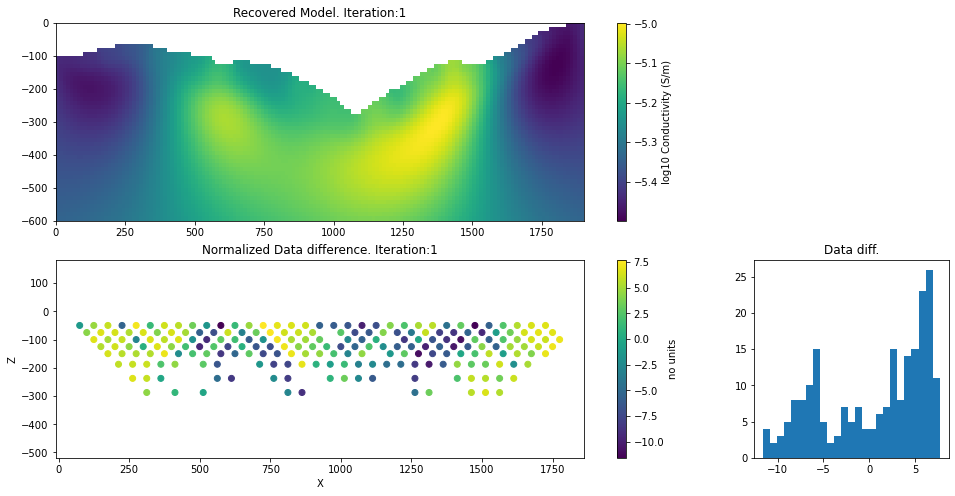

In [43]:
plot_results(1, s, inv_5per_rs, clim)

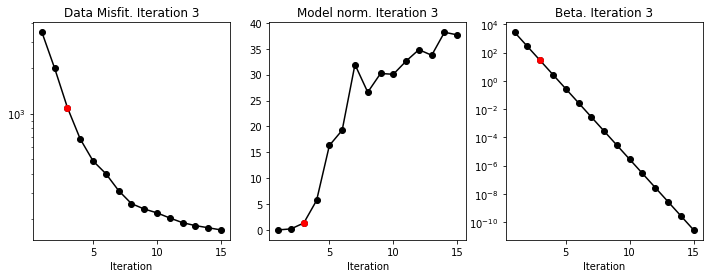

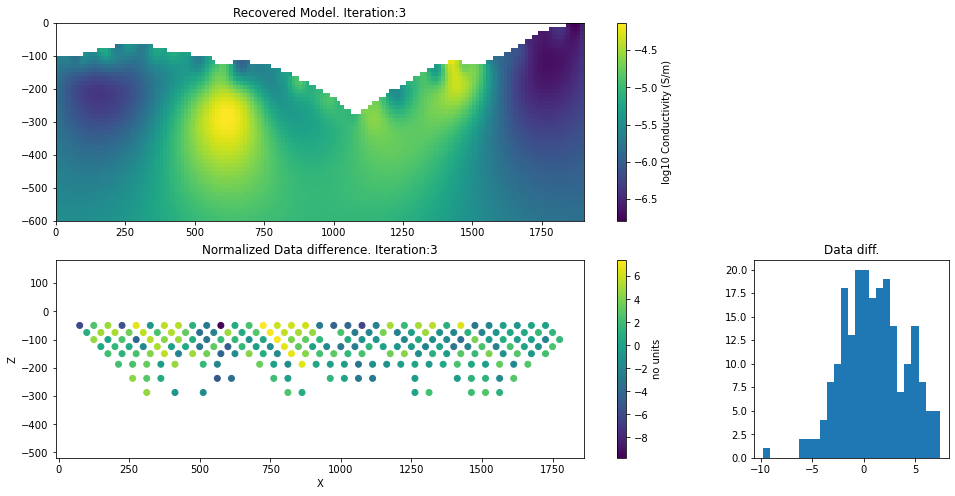

In [44]:
plot_results(3, s, inv_5per_rs, clim)

### Rescale again using the 3rd iteration results

In [45]:
# load file
inv_std_5_per_rescale_2_filename = Path(results_path / "inv_std_5_per_rescale_2.pkl")
inv_5_per_rescale_2_dict = load_results_dict(inv_std_5_per_rescale_2_filename)
# get variables out of the dict into the setup namespace inv1
inv_5per_rs2 = SimpleNamespace(**inv_5_per_rescale_2_dict)

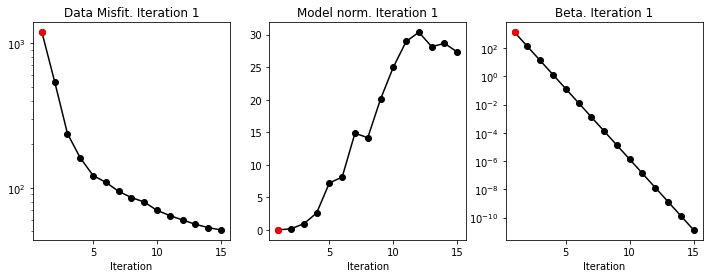

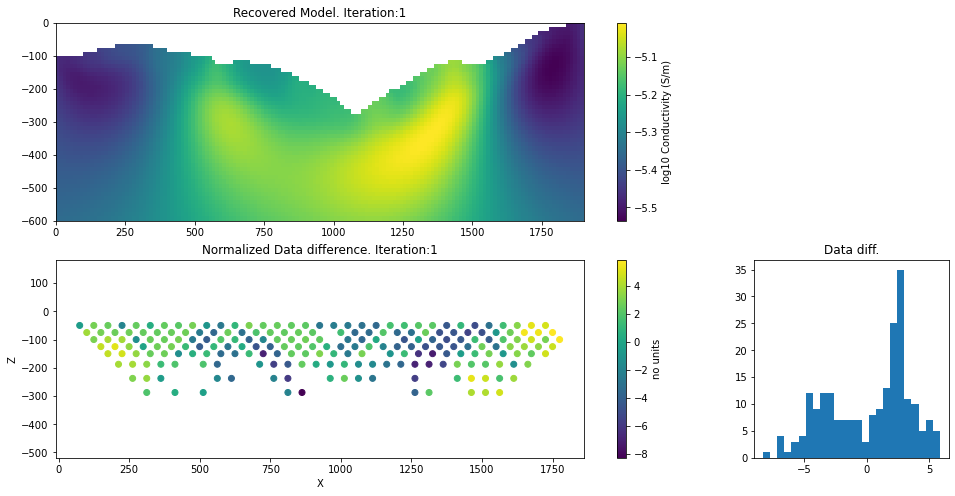

In [46]:
plot_results(1, s, inv_5per_rs2, clim)

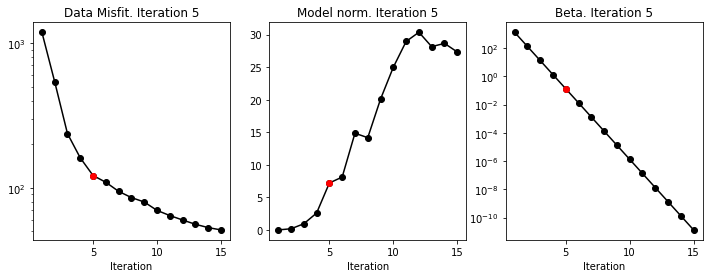

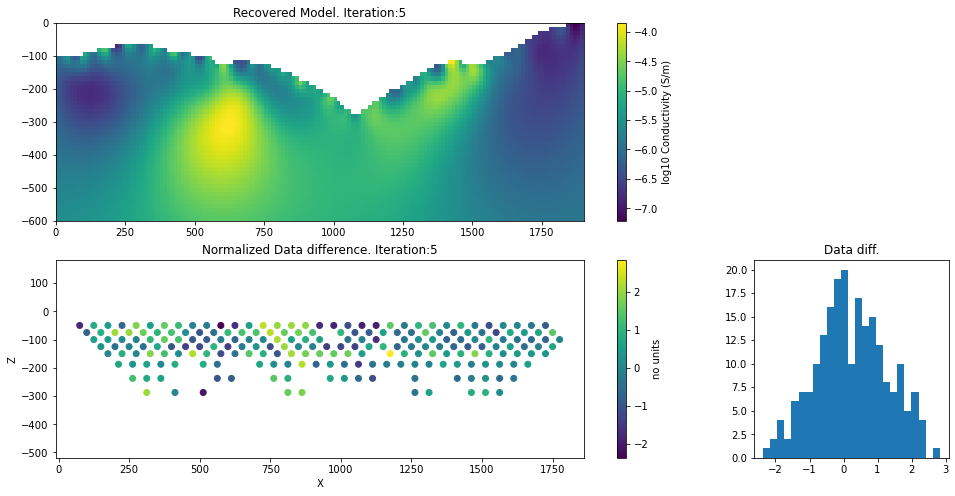

In [47]:
plot_results(5, s, inv_5per_rs2, clim)

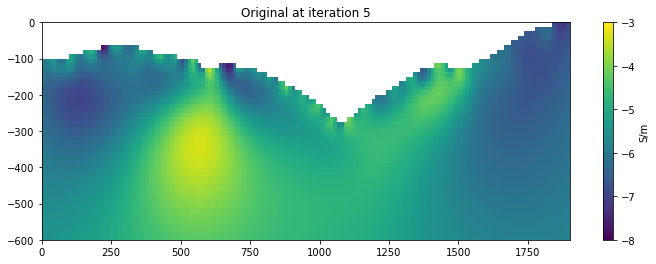

In [48]:
clim = [-8,-3]
plot_model_wrapper(5, s, inv_5per, "Original", clim )

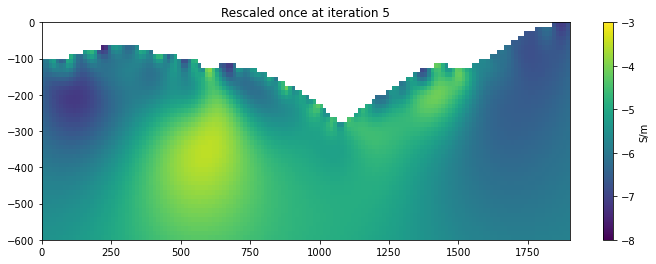

In [49]:
plot_model_wrapper(5, s, inv_5per_rs, "Rescaled once", clim)

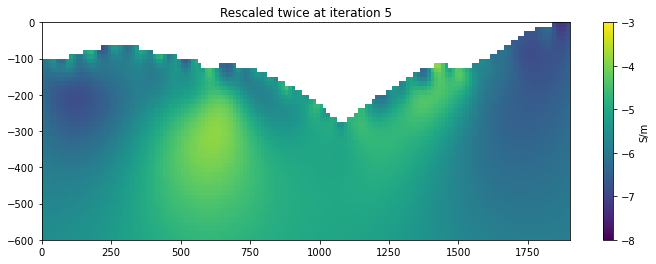

In [50]:
plot_model_wrapper(5, s, inv_5per_rs2, "Rescaled twice", clim)

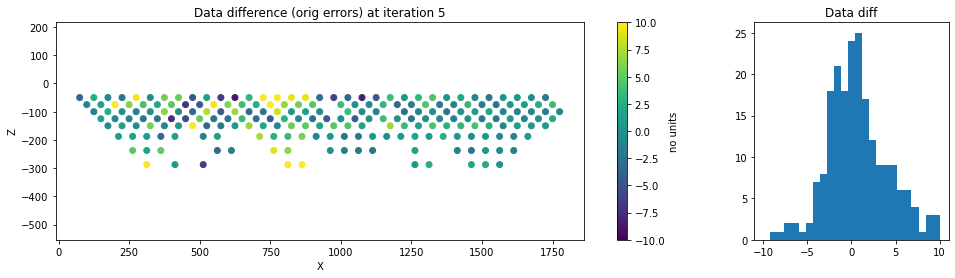

In [54]:
data_lim=[-10,10]
plot_data_diff_wrapper(5, s, inv_5per, 'Data difference (orig errors)', data_lim=data_lim)

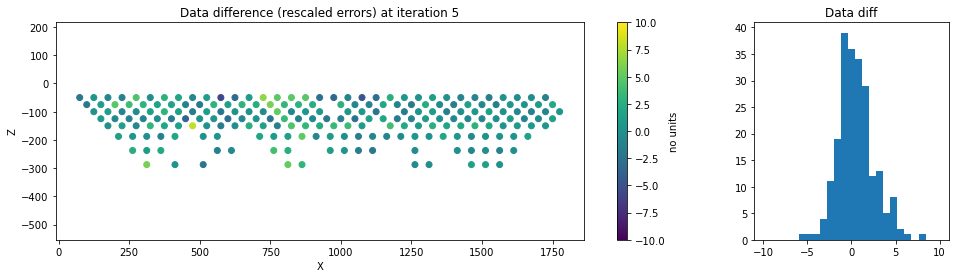

In [55]:
plot_data_diff_wrapper(5, s, inv_5per_rs, 'Data difference (rescaled errors)', data_lim=data_lim)

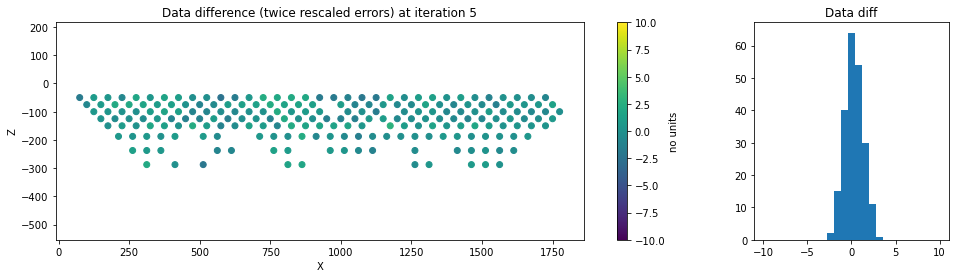

In [56]:
plot_data_diff_wrapper(5, s, inv_5per_rs2, 'Data difference (twice rescaled errors)', data_lim=data_lim)